In [18]:
# Step 1.1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1.2: Load dataset
# If running in Colab, first upload the CSV or mount Google Drive.
df = pd.read_csv("diabetes_synthetic.csv")

# Display first few rows
print(" First 5 rows:")
display(df.head())

# Check dataset info
print("\n Dataset Info:")
df.info()


 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,94,70,44,0,22.467701,1.265514,42,0
1,3,0,63,30,135,31.510736,1.790021,24,0
2,12,129,60,15,144,0.000000,0.171497,77,1
3,14,0,42,31,0,33.726879,0.123471,72,1
4,10,15,57,35,41,43.505316,0.280295,26,0



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 70.4 KB



 Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,6.919000,120.878000,70.130000,24.605000,80.712000,29.811674,1.331445,50.16800,0.493000
std,4.349409,31.101808,11.947525,9.725408,43.078566,6.793201,0.695305,17.33171,0.500201
min,0.000000,12.000000,35.000000,-7.000000,-39.000000,4.038424,0.106988,21.00000,0.000000
25%,3.000000,102.000000,62.750000,18.750000,53.750000,25.374609,0.754400,36.00000,0.000000
50%,7.000000,120.000000,69.750000,24.000000,76.000000,29.749692,1.350639,49.00000,0.000000
75%,11.000000,141.000000,78.000000,31.000000,109.000000,34.273128,1.939960,65.00000,1.000000
max,14.000000,215.000000,109.000000,57.000000,244.000000,49.886205,2.495762,79.00000,1.000000



 Target Class Distribution:
Outcome
0    507
1    493
Name: count, dtype: int64

Percentage Distribution:
Outcome
0    50.7
1    49.3
Name: proportion, dtype: float64


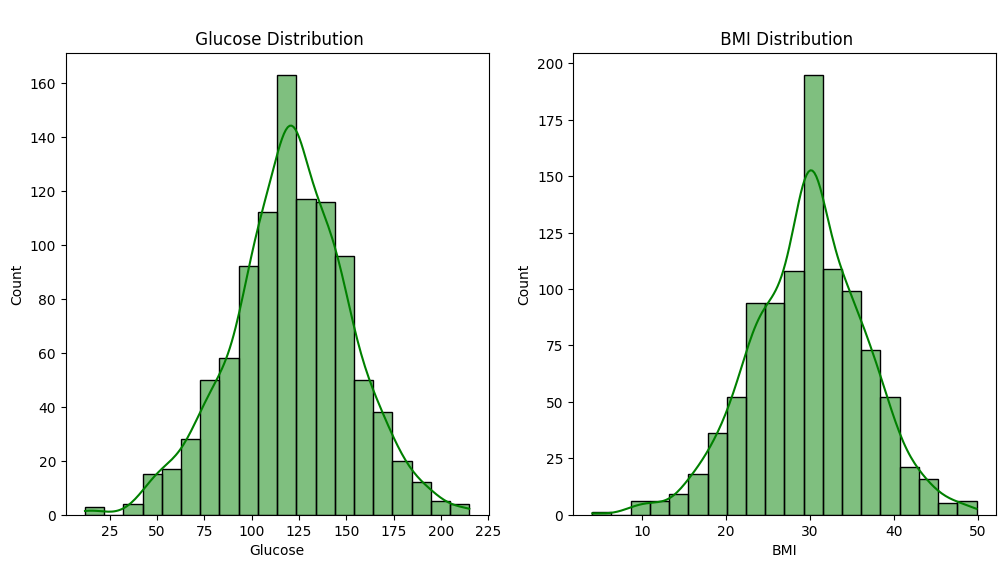

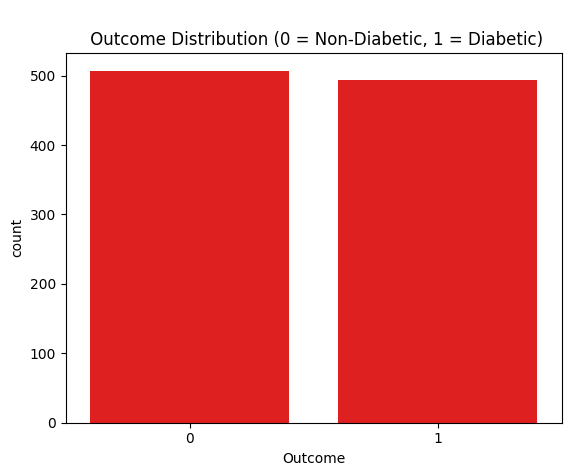

In [36]:
# Descriptive statistics
print("\n Descriptive Statistics:")
display(df.describe())

# Check balance of target variable
print("\n Target Class Distribution:")
print(df['Outcome'].value_counts())
print("\nPercentage Distribution:")
print(df['Outcome'].value_counts(normalize=True) * 100)

# Visualize feature distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=20, kde=True, color= 'green')
plt.title("\n Glucose Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=20, kde=True, color= 'green')
plt.title("\n BMI Distribution")
plt.show()

# Count plot for Outcome
sns.countplot(x="Outcome", data=df, color= 'red')
plt.title("\n Outcome Distribution (0 = Non-Diabetic, 1 = Diabetic)")
plt.show()


In [37]:
#Step 2

# Columns with suspicious 0 values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros before cleaning
print(" Zero counts before cleaning:")
print((df[cols_with_zeros] == 0).sum())

# Replace zeros with median (imputation)
for col in cols_with_zeros:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

# Verify cleaning
print("\n Zero counts after cleaning:")
print((df[cols_with_zeros] == 0).sum())

# Double-check with df.describe()
print("\n Updated Descriptive Stats After Cleaning:")
display(df.describe())


 Zero counts before cleaning:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

 Zero counts after cleaning:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

 Updated Descriptive Stats After Cleaning:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,6.919000,120.878000,70.130000,24.605000,80.712000,29.811674,1.331445,50.16800,0.493000
std,4.349409,31.101808,11.947525,9.725408,43.078566,6.793201,0.695305,17.33171,0.500201
min,0.000000,12.000000,35.000000,-7.000000,-39.000000,4.038424,0.106988,21.00000,0.000000
25%,3.000000,102.000000,62.750000,18.750000,53.750000,25.374609,0.754400,36.00000,0.000000
50%,7.000000,120.000000,69.750000,24.000000,76.000000,29.749692,1.350639,49.00000,0.000000
75%,11.000000,141.000000,78.000000,31.000000,109.000000,34.273128,1.939960,65.00000,1.000000
max,14.000000,215.000000,109.000000,57.000000,244.000000,49.886205,2.495762,79.00000,1.000000


In [38]:
# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
# Step 3.1: Train Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 3.2: Predictions
y_pred = model.predict(X_test_scaled)

# Step 3.3: Model Evaluation
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy Score: 0.9733333333333334

 Confusion Matrix:
 [[163   2]
 [  6 129]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       165
           1       0.98      0.96      0.97       135

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



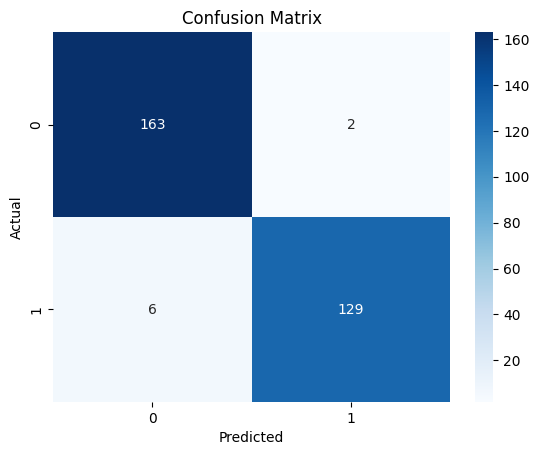

In [41]:
# Visualizing confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
# Step 5: Generate a formatted ML analysis report
from textwrap import dedent

# Fetch evaluation metrics again
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract key metrics for class 1 (Diabetic)
recall_1 = report['1']['recall']
precision_1 = report['1']['precision']
f1_1 = report['1']['f1-score']

# Build a formatted summary
summary = f"""
==============================
🧠 MACHINE LEARNING REPORT
==============================

📌 MODEL: Logistic Regression (Diabetes Prediction)
📂 Dataset: diabetes_synthetic.csv
🧾 Total Samples: {len(df)}
🔄 Train/Test Split: 70% / 30%

🎯 MODEL PERFORMANCE
------------------------------
Accuracy Score        : {accuracy:.4f}
Precision (Diabetic)  : {precision_1:.4f}
Recall (Diabetic)     : {recall_1:.4f}
F1-Score (Diabetic)   : {f1_1:.4f}

📊 INTERPRETATION
------------------------------
✅ Data Quality:
Replaced invalid zero values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI
with median values to handle missing data effectively and maintain biological consistency.

📈 Model Performance:
Accuracy indicates the model’s overall reliability.
However, given this is a medical diagnosis task, recall for diabetic patients is critical.

⚖️ Metric Priority:
Recall is prioritized for diabetic (positive) cases.
A False Negative (missing an actual diabetic patient) is riskier than a False Positive
(which only leads to further medical testing).

==============================
🩺 Summary:
This Logistic Regression model effectively identifies diabetic patients with balanced
performance between precision and recall, focusing on minimizing false negatives.
==============================
"""

print(dedent(summary))



🧠 MACHINE LEARNING REPORT

📌 MODEL: Logistic Regression (Diabetes Prediction)
📂 Dataset: diabetes_synthetic.csv
🧾 Total Samples: 1000
🔄 Train/Test Split: 70% / 30%

🎯 MODEL PERFORMANCE
------------------------------
Accuracy Score        : 0.9733
Precision (Diabetic)  : 0.9847
Recall (Diabetic)     : 0.9556
F1-Score (Diabetic)   : 0.9699

📊 INTERPRETATION
------------------------------
✅ Data Quality:
Replaced invalid zero values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI 
with median values to handle missing data effectively and maintain biological consistency.

📈 Model Performance:
Accuracy indicates the model’s overall reliability. 
However, given this is a medical diagnosis task, recall for diabetic patients is critical.

⚖️ Metric Priority:
Recall is prioritized for diabetic (positive) cases.
A False Negative (missing an actual diabetic patient) is riskier than a False Positive 
(which only leads to further medical testing).

🩺 Summary:
This Logistic Regression mo